### Data Loading

In [1]:
import os

imdb_dir = "D:\Bunny\Projects\Self\IMDB Reviews\Dataset"
train_dir = os.path.join(imdb_dir, 'train')

texts = []
labels = []

for label_type in ['pos', 'neg']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            try:
                f = open(os.path.join(dir_name, fname))
                texts.append(f.read())
            except:
                print("An error occured with", label_type + "/" + fname)
            else:
                if label_type == 'pos':
                    labels.append(1)
                else:
                    labels.append(0)
            finally:
                f.close()

An error occured with pos/10327_7.txt
An error occured with pos/11351_9.txt
An error occured with pos/11668_7.txt
An error occured with pos/12467_7.txt
An error occured with pos/1990_10.txt
An error occured with pos/2362_9.txt
An error occured with pos/2538_10.txt
An error occured with pos/4942_7.txt
An error occured with pos/5343_8.txt
An error occured with pos/8263_9.txt
An error occured with pos/9107_7.txt
An error occured with neg/11325_4.txt
An error occured with neg/12391_4.txt
An error occured with neg/4526_4.txt
An error occured with neg/6122_2.txt
An error occured with neg/7714_1.txt


In [2]:
print("Size of the data:", len(texts))

Size of the data: 24984


### Tokenizing the data

In [3]:
vocab_size = 50000
oov_token = '<OOV>'
maxlen = 300
pad_type = 'post'
trunc_type = 'post'

train_size = int(0.8 * len(texts))

embedding_dim = 200

In [4]:
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
import numpy as np

tokenizer = Tokenizer(num_words = vocab_size, oov_token = oov_token)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('Found', len(word_index), 'unique tokens')

sequences = pad_sequences(sequences, maxlen, padding = pad_type, truncating = trunc_type)
labels = np.asarray(labels)

Found 88414 unique tokens


In [5]:
indices = np.arange(sequences.shape[0])
np.random.shuffle(indices)

data = sequences[indices]
labels = labels[indices]

In [6]:
print('Shape of data tensor:', sequences.shape)
print('Shape of labels tensor:', labels.shape)

Shape of data tensor: (24984, 300)
Shape of labels tensor: (24984,)


### Train-validation split

In [7]:
train_data = data[:train_size]
train_labels = labels[:train_size]
validation_data = data[train_size:]
validation_labels = labels[train_size:]

print("Shape of training data tensor:", train_data.shape)
print("Shape of training labels tensor:", train_labels.shape)
print("Shape of validation data tensor:", validation_data.shape)
print("Shape of validation labels tensor:", validation_labels.shape)

Shape of training data tensor: (19987, 300)
Shape of training labels tensor: (19987,)
Shape of validation data tensor: (4997, 300)
Shape of validation labels tensor: (4997,)


### RNN Architecture

In [8]:
from keras.models import Sequential
from keras import layers

model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim, input_length = maxlen))
model.add(layers.Bidirectional(layers.LSTM(64, return_sequences = True)))
model.add(layers.Bidirectional(layers.LSTM(64)))
model.add(layers.Lambda(lambda x: x * 100.0))
model.add(layers.Dense(32, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [9]:
model.compile(loss = 'binary_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])

num_epochs = 20

history = model.fit(train_data, train_labels, 
                    epochs = num_epochs, 
                    validation_data = (validation_data, validation_labels))

Epoch 1/20
625/625 [==============================] - 594s 924ms/step - loss: 0.5386 - accuracy: 0.7391 - val_loss: 0.3896 - val_accuracy: 0.8377
Epoch 2/20
625/625 [==============================] - 568s 909ms/step - loss: 0.3268 - accuracy: 0.8735 - val_loss: 0.3186 - val_accuracy: 0.8719
Epoch 3/20
625/625 [==============================] - 576s 922ms/step - loss: 0.2593 - accuracy: 0.9078 - val_loss: 0.3833 - val_accuracy: 0.8367
Epoch 4/20
625/625 [==============================] - 572s 915ms/step - loss: 0.2000 - accuracy: 0.9314 - val_loss: 0.6249 - val_accuracy: 0.8151
Epoch 5/20
625/625 [==============================] - 576s 922ms/step - loss: 0.1518 - accuracy: 0.9492 - val_loss: 0.4443 - val_accuracy: 0.8463
Epoch 6/20
625/625 [==============================] - 587s 939ms/step - loss: 0.1150 - accuracy: 0.9648 - val_loss: 0.4848 - val_accuracy: 0.8609
Epoch 7/20
625/625 [==============================] - 896s 1s/step - loss: 0.0888 - accuracy: 0.9736 - val_loss: 0.7014 - va

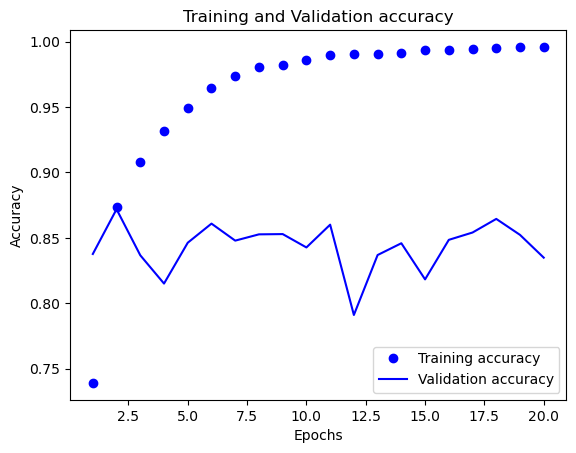

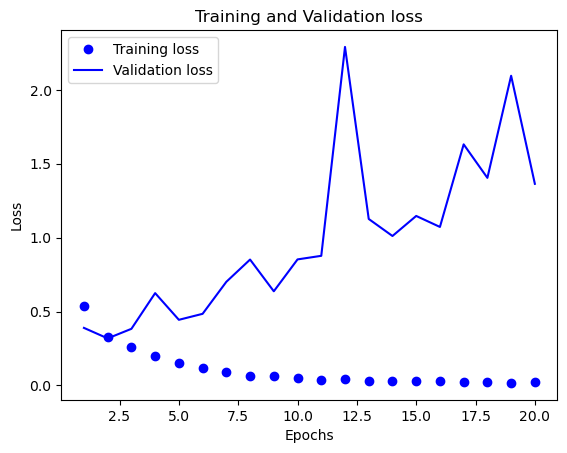

<Figure size 640x480 with 0 Axes>

In [10]:
# Plotting training and Validation accuracy

import matplotlib.pyplot as plt

epochs = range(1, num_epochs + 1)

plt.plot(epochs, history.history['accuracy'], 'bo', label = 'Training accuracy')
plt.plot(epochs, history.history['val_accuracy'], 'b', label = 'Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, history.history['loss'], 'bo', label = 'Training loss')
plt.plot(epochs, history.history['val_loss'], 'b', label = 'Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()
plt.clf()

### Solving Overfitting 

In [26]:
model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim, input_length = maxlen))
model.add(layers.Bidirectional(layers.LSTM(32, return_sequences = True)))
model.add(layers.Bidirectional(layers.LSTM(64)))
model.add(layers.Lambda(lambda x: x * 100.0))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])


num_epochs = 10
history = model.fit(train_data, train_labels, 
                    epochs = num_epochs, 
                    validation_data = (validation_data, validation_labels))

Epoch 1/10
625/625 [==============================] - 663s 1s/step - loss: 0.6980 - accuracy: 0.4977 - val_loss: 0.6932 - val_accuracy: 0.4973
Epoch 2/10
625/625 [==============================] - 683s 1s/step - loss: 0.6946 - accuracy: 0.4975 - val_loss: 0.7009 - val_accuracy: 0.4947
Epoch 3/10
625/625 [==============================] - 701s 1s/step - loss: 0.6999 - accuracy: 0.5003 - val_loss: 0.6931 - val_accuracy: 0.4973
Epoch 4/10
625/625 [==============================] - 696s 1s/step - loss: 0.7030 - accuracy: 0.5139 - val_loss: 0.6815 - val_accuracy: 0.6148
Epoch 5/10
625/625 [==============================] - 697s 1s/step - loss: 0.5043 - accuracy: 0.7801 - val_loss: 0.3905 - val_accuracy: 0.8289
Epoch 6/10
625/625 [==============================] - 702s 1s/step - loss: 0.3415 - accuracy: 0.8666 - val_loss: 0.3583 - val_accuracy: 0.8651
Epoch 7/10
625/625 [==============================] - 693s 1s/step - loss: 0.2585 - accuracy: 0.9033 - val_loss: 0.3524 - val_accuracy: 0.8523

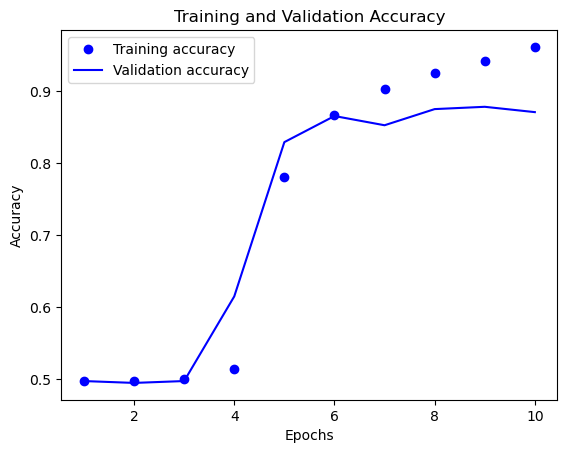

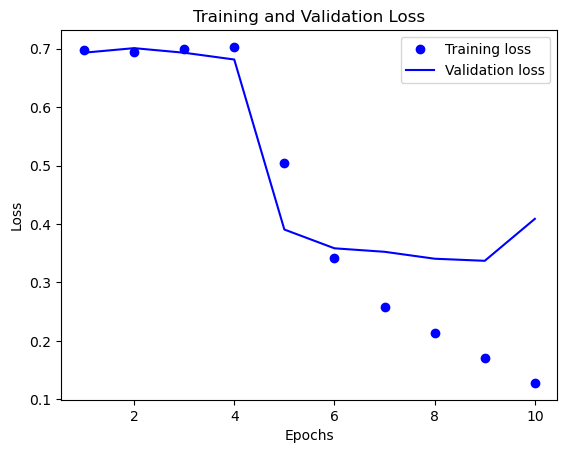

<Figure size 640x480 with 0 Axes>

In [27]:
# Plotting Training and Validation accuracy and loss

epochs = range(1, num_epochs + 1)

plt.plot(epochs, history.history['accuracy'], 'bo', label = 'Training accuracy')
plt.plot(epochs, history.history['val_accuracy'], 'b', label = 'Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, history.history['loss'], 'bo', label = 'Training loss')
plt.plot(epochs, history.history['val_loss'], 'b', label = 'Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()
plt.clf()

In [67]:
review = ["Avengers: Endgame is an epic culmination of the Marvel Cinematic Universe that delivers a rollercoaster ride of emotions and a grand-scale superhero spectacle. Directed by Joe and Anthony Russo, the film seamlessly weaves together multiple storylines and characters from the franchise's extensive roster, providing a satisfying conclusion to the Infinity Saga. The stakes are high as the remaining Avengers face the aftermath of Thanos' devastating snap and embark on a time-bending mission to undo the decimation. The film masterfully balances action-packed sequences with heartfelt character moments, allowing each hero to shine in their own right. The performances are stellar across the board, with Robert Downey Jr. and Chris Evans delivering particularly poignant and emotionally charged portrayals of Iron Man and Captain America, respectively. The screenplay skillfully blends humor, drama, and nostalgia, eliciting laughter and tears from the audience. As the film hurtles towards its climactic battle, the visual effects are nothing short of breathtaking, with jaw-dropping set pieces and awe-inspiring superhero team-ups. The film's three-hour runtime flies by, thanks to the well-paced narrative and a compelling storyline that keeps viewers engaged from start to finish. Avengers: Endgame not only provides a satisfying conclusion to a decade-long saga but also serves as a celebration of the Marvel Universe, rewarding fans with fan service and unexpected surprises. With its emotional depth, stunning visuals, and a fitting send-off for beloved characters, Avengers: Endgame solidifies its place as one of the greatest superhero films of all time."]
print(len(review[0].split()))

seq_review = tokenizer.texts_to_sequences(review)
seq_review = pad_sequences(seq_review, maxlen = maxlen, padding = 'post', truncating = 'post')

y = model.predict(seq_review, verbose = 0)
### print(y, (1 - y))

if y > 0.5:
    print("positive")
else:
    print("negative")

243
positive
